In [1]:
import astropy
from astropy.io import fits 
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from astropy.time import Time
from astropy.table import Table
import

In [2]:
file = '/Users/katborski/Documents/GitHub/AFPSC/TESS/tess2021232031932-s0042-0000000250081915-0213-a_fast-lc.fits'
data1 = astropy.io.fits.open(file)

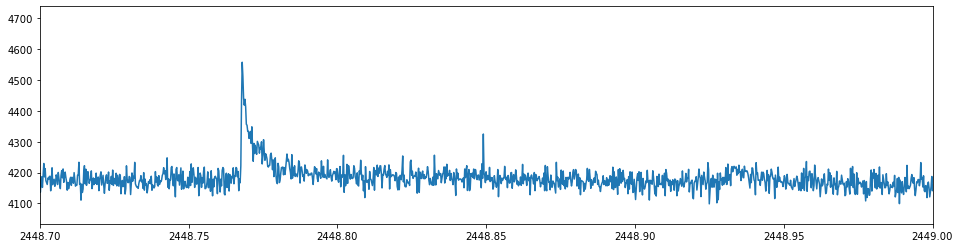

In [3]:
with fits.open(file, mode="readonly") as hdulist:
    tess_bjds = hdulist[1].data['TIME']
    pdcsap_fluxes = hdulist[1].data['PDCSAP_FLUX']

plt.figure(figsize = (16,4))
plt.xlim(2448.7,2449)
plt.plot(tess_bjds, pdcsap_fluxes)
plt.show()

In [4]:
#nanFlux = np.where(np.isnan(pdcsap_fluxes))
#tessFLUX = list(np.delete(pdcsap_fluxes, nanFlux))
#len(tessFLUX)

In [5]:
#nanTime = np.where(np.isnan(tess_bjds))
#tessTIME = list(np.delete(tess_bjds,nanTime))
#len(tessTIME)

In [6]:
#tess_flux = np.delete(tessFLUX, nanTime)
#len(tess_flux)

In [7]:
#tess_time = np.delete(tessTIME, nanFlux)
#len(tess_time)
d = pd.DataFrame(data1[1].data)
d

,TIME,TIMECORR,CADENCENO,SAP_FLUX,SAP_FLUX_ERR,SAP_BKG,SAP_BKG_ERR,PDCSAP_FLUX,PDCSAP_FLUX_ERR,QUALITY,PSF_CENTR1,PSF_CENTR1_ERR,PSF_CENTR2,PSF_CENTR2_ERR,MOM_CENTR1,MOM_CENTR1_ERR,MOM_CENTR2,MOM_CENTR2_ERR,POS_CORR1,POS_CORR2
0,2447.689993,0.005277,5271395,NaN,NaN,NaN,NaN,NaN,NaN,172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2447.690225,0.005277,5271396,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2447.690456,0.005277,5271397,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2447.690688,0.005277,5271398,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2447.690919,0.005277,5271399,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110050,2473.164995,0.005753,5381445,NaN,NaN,NaN,NaN,NaN,NaN,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110051,2473.165226,0.005753,5381446,NaN,NaN,NaN,NaN,NaN,NaN,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110052,2473.165458,0.005753,5381447,NaN,NaN,NaN,NaN,NaN,NaN,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110053,2473.165689,0.005753,5381448,NaN,NaN,NaN,NaN,NaN,NaN,16384,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df = pd.DataFrame(
    {
        "Time": d["TIME"],
        "Flux": d["PDCSAP_FLUX"]
    })

In [9]:
data = df.dropna(how='any')
flux = data['Flux']
flux

25       4178.156738
26       4193.419922
27       4184.613281
28       4195.867188
29       4174.927246
            ...     
99987    4173.302246
99988    4175.595215
99989    4188.241699
99990    4175.395996
99991    4178.837402
Name: Flux, Length: 66884, dtype: float32

In [79]:
tess_jd = []
for i in data["Time"]: 
    r = i + 2457000
    tess_jd.append(r)
p = Time(tess_jd, format = 'jd', scale = 'utc')
p.format = 'iso'
p

<Time object: scale='utc' format='iso' value=['2021-08-21 04:41:55.439' '2021-08-21 04:42:15.439'
 '2021-08-21 04:42:35.440' ... '2021-09-13 08:03:55.338'
 '2021-09-13 08:04:15.338' '2021-09-13 08:04:35.338']>

In [80]:
df1 = pd.DataFrame( 
    {
        "Time": p,
        "Flux": data["Flux"]
    })

<AxesSubplot:>

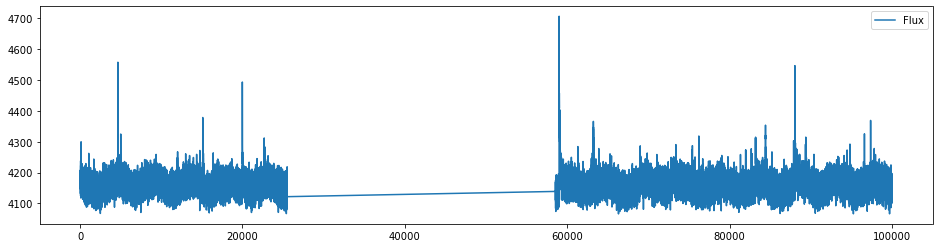

In [81]:
df1.plot(figsize = (16,4))
